In [173]:
#import all libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce
# import plotly express
import plotly.express as px

In [174]:
df = pd.read_csv('housing.csv')

In [175]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [176]:
# you must declare depending and independing variable
# We are going to predict price. 
# X are the inputs, dropping price from X axis
y = df['PRICE']
X = df.drop('PRICE', axis=1)

In [177]:
#making a 80:20 cutoff, 20% will be test data and 80% will be training.
cutoff = int(df.shape[0]*.8)

X_train, X_test = X[:cutoff].copy(), X[cutoff:].copy()
y_train, y_test  = y[:cutoff].copy(), y[cutoff:].copy()

In [178]:
gbm = GradientBoostingRegressor()

In [179]:
#fit training data
gbm.fit(X_train, y_train)

GradientBoostingRegressor()

In [180]:
#score on test data
score_with_80_20_split = gbm.score(X_test, y_test)
score_with_80_20_split

0.41068999209029244

In [181]:
gbm.feature_importances_

array([5.25360388e-02, 5.75715606e-04, 1.04980513e-03, 4.54879695e-04,
       1.33696223e-02, 5.78236773e-01, 1.37636349e-02, 8.39802509e-02,
       7.15587959e-04, 1.86130771e-02, 2.23282714e-02, 3.98590194e-03,
       2.10390441e-01])

In [122]:
importances = pd.DataFrame({
    'Column': X.columns,
    'Importance': gbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances

,Column,Importance
5,RM,0.579612
12,LSTAT,0.210783
7,DIS,0.082781
0,CRIM,0.048611
10,PTRATIO,0.020112
4,NOX,0.019053
9,TAX,0.017924
6,AGE,0.013960
11,B,0.004260
2,INDUS,0.001055


In [182]:
#since in gbm RM has the highest importance value, used a scatter chart to plot that.
fig = px.scatter(df, 
                 x = 'RM', # Room number
                 y = 'PRICE', # House Price
                 labels = {'room': 'Room Number', 'price' : 'House Price'},
                 title = 'Relationship between room  and price',
                 trendline = 'ols'    # Trendline
                )
fig.show()

#observation: Houses with more rooms will have HIGHER house price

In [183]:
fig = px.scatter(df, 
                 x = 'CHAS', # Charles River
                 y = 'PRICE', # House Price
                 labels = {'chas': 'Charles River', 'price' : 'House Price'},
                 title = 'Relationship between houses on charles river and price',
                 trendline = 'ols'    # Trendline
                )
fig.show()

#observation: Houses closer to river will have HIGHER house price

In [100]:
fig = px.scatter(df, 
                 x = 'LSTAT', # percentage of lower income people
                 y = 'PRICE', # House Price
                 labels = {'lstat': 'Lower Income', 'price' : 'House Price'},
                 title = 'Relationship between percentage of lower income people and price',
                 trendline = 'ols'    # Trendline
                )
fig.show()


#observation: Neighborhoods with less lower income people will have HIGHER house price

In [184]:
fig = px.scatter(df, 
                 x = 'PTRATIO', # Pupil Teacher ratio
                 y = 'PRICE', # House Price
                 labels = {'ptrario': 'Pupil Teacher ratio', 'price' : 'House Price'},
                 title = 'Relationship between percentage of Pupil Teacher ratio  and price',
                 trendline = 'ols'    # Trendline
                )
fig.show()
#observation: Neighborhoods with lower Pupil Teacher ratio  will have HIGHER house price

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

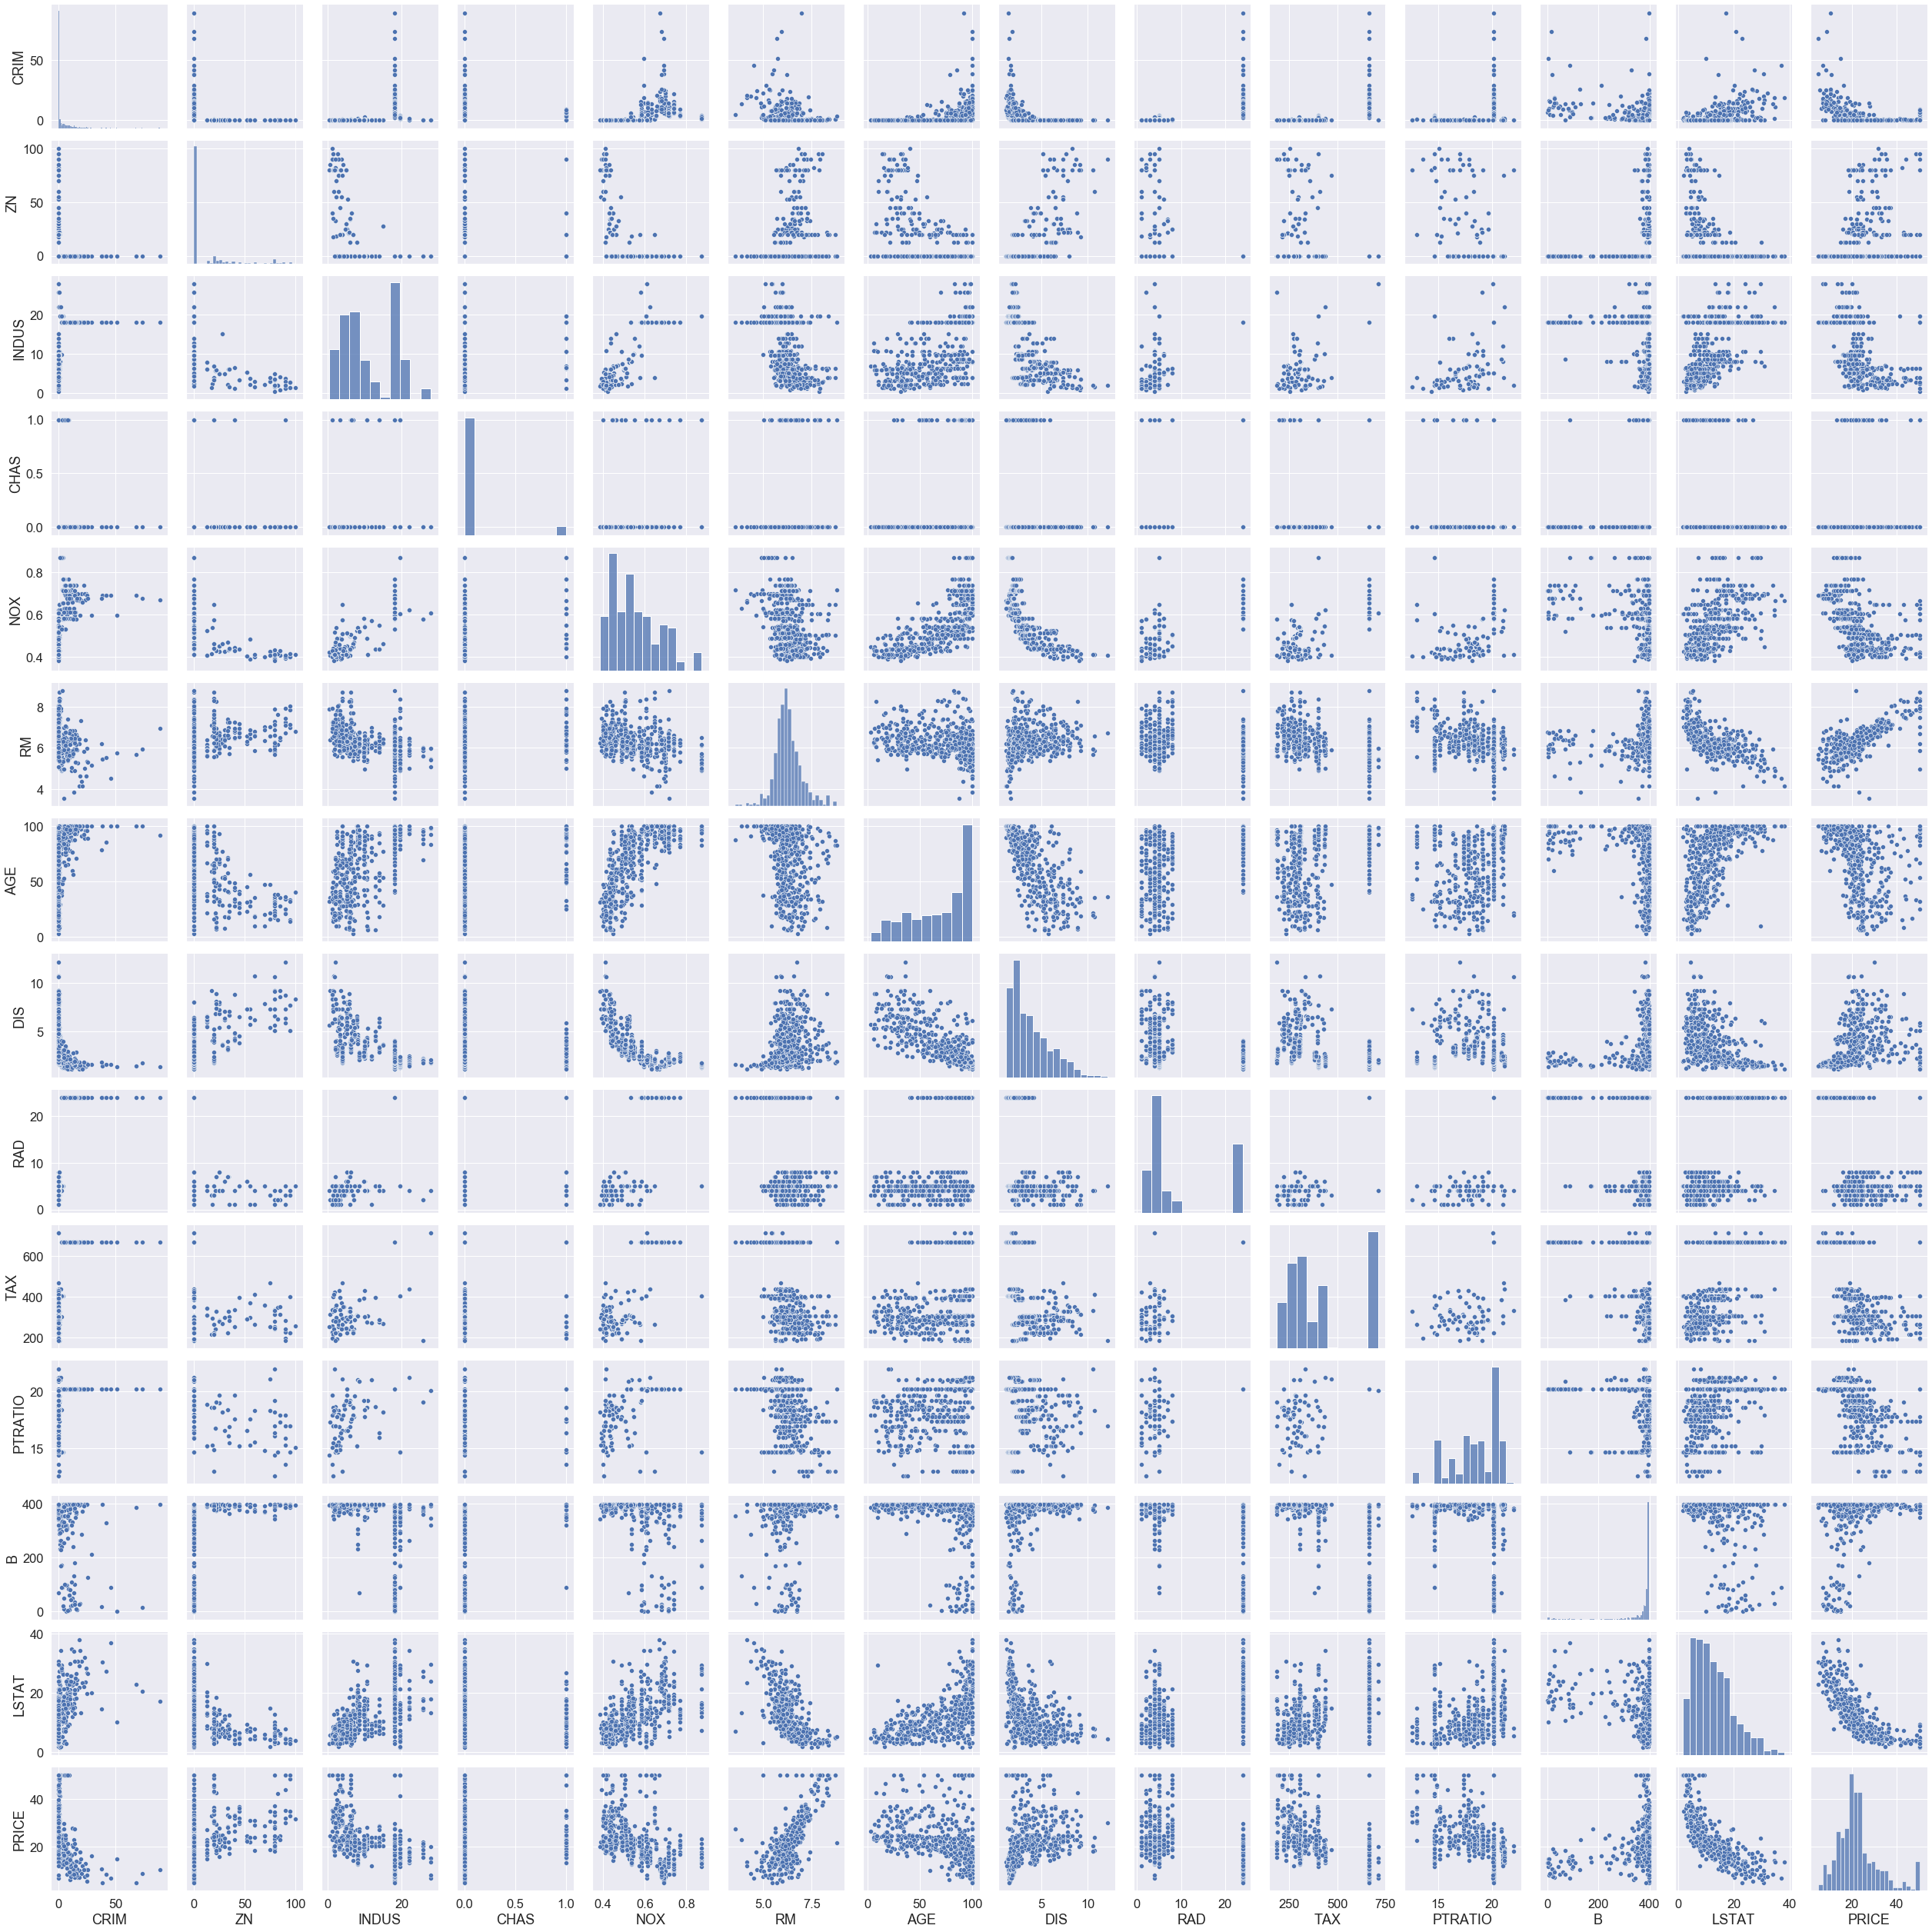

In [186]:
#experimenting the searborn library to see the imapct of other features on house price
sns.pairplot(df, height=2.5)
plt.tight_layout()

In [145]:
#TO DELETE
# cm = np.corrcoef(df.values.T)
# sns.set(font_scale=1.5)
# hm = sns.heatmap(cm,
#                 cbar=True,
#                 annot=True,
#                 square=True,
#                 fmt='.2f',
#                 annot_kws={'size': 15}
#                 )

In [187]:
def create_val_splits(df, val_units=15, return_val=False):
    """Function that will take in a dataset and split it up into training, validation, and test sets"""
    # split into training, validation, and test sets
    train = df.groupby('CHAS').apply(lambda x: x.iloc[:-val_units]).reset_index(drop=True)
    test  = df.groupby('CHAS').apply(lambda x: x.iloc[-val_units:]).reset_index(drop=True)
    
    if return_val:
        val   = train.groupby('CHAS').apply(lambda x: x.iloc[-val_units:]).reset_index(drop=True)
        train = train.groupby('CHAS').apply(lambda x: x.iloc[:-val_units]).reset_index(drop=True)
        return train, val, test
    else:
        return train, test

In [188]:
train, val, test = create_val_splits(df, return_val=True)

In [189]:
X_train_chas, y_train_chas = train.drop('PRICE', axis =1), train['PRICE']
X_val_chas, y_val_chas = val.drop('PRICE', axis =1), val['PRICE']
X_test_chas, y_test_chas = test.drop('PRICE', axis =1), test['PRICE']

In [190]:
gbm_chas = GradientBoostingRegressor()
gbm_chas.fit(X_train_chas, y_train_chas)

GradientBoostingRegressor()

In [191]:
gbm_score_group_by_chas = gbm_chas.score(X_val_chas,y_val_chas)
gbm_score_group_by_chas

0.8604330909439957

In [56]:
gbm.feature_importances_


array([4.94642142e-02, 4.09087735e-04, 1.86571748e-03, 4.83280691e-05,
       3.20700862e-02, 4.56298980e-01, 8.48398488e-03, 3.46990714e-02,
       7.36632472e-04, 1.12471913e-02, 1.69377802e-02, 9.37904897e-03,
       3.78359877e-01])

In [152]:
# statistical mean value calculation
# planning to do a groupby based on the the RM value greater than mena and less than mean
mean_room = np.mean(df['RM'])
mean_room

6.284634387351788

In [153]:
#funtion to define the room buckets
def buckets(x):
    if x > mean_room:
        return mean_room+1
    else:
        return mean_room-1

def create_val_splits_RM(df, val_units=15, return_val=False):
    """Function that will take in a dataset and split it up into training, validation, and test sets"""
    # split into training, validation, and test sets
    train = df.groupby(df['RM'].map(buckets)).apply(lambda x: x.iloc[:-val_units]).reset_index(drop=True)
    test  = df.groupby(df['RM'].map(buckets)).apply(lambda x: x.iloc[-val_units:]).reset_index(drop=True)
    
    if return_val:
        val   = train.groupby(df['RM'].map(buckets)).apply(lambda x: x.iloc[-val_units:]).reset_index(drop=True)
        train = train.groupby(df['RM'].map(buckets)).apply(lambda x: x.iloc[:-val_units]).reset_index(drop=True)
        return train, val, test
    else:
        return train, test

    

In [154]:
train_RM, val_RM, test_RM = create_val_splits_RM(df, return_val=True)

In [74]:
X_train_RM, y_train_RM = train_RM.drop('PRICE', axis =1), train['PRICE']
X_val_RM, y_val_RM = val_RM.drop('PRICE', axis =1), val['PRICE']
X_test_RM, y_test_RM = test_RM.drop('PRICE', axis =1), test['PRICE']

In [155]:
gbm_rm = GradientBoostingRegressor()
gbm_rm.fit(X_train_RM, y_train_RM)

GradientBoostingRegressor()

In [157]:
gbm_score_group_by_RM_mean = gbm_rm.score(X_val_RM,y_val_RM)
gbm_score_group_by_RM_mean

-0.917916706590929

In [158]:
df_3col = df[['RM','PRICE', 'LSTAT']]
df_3col

,RM,PRICE,LSTAT
0,6.575,24.0,4.98
1,6.421,21.6,9.14
2,7.185,34.7,4.03
3,6.998,33.4,2.94
4,7.147,36.2,5.33
...,...,...,...
501,6.593,22.4,9.67
502,6.120,20.6,9.08
503,6.976,23.9,5.64
504,6.794,22.0,6.48


In [159]:
def create_val_splits_3col(df, val_units=15, return_val=False):
    """Function that will take in a dataset and split it up into training, validation, and test sets"""
    # split into training, validation, and test sets
    train = df.apply(lambda x: x.iloc[:-val_units]).reset_index(drop=True)
    test  = df.apply(lambda x: x.iloc[-val_units:]).reset_index(drop=True)
    
    if return_val:
        val   = train.apply(lambda x: x.iloc[-val_units:]).reset_index(drop=True)
        train = train.apply(lambda x: x.iloc[:-val_units]).reset_index(drop=True)
        return train, val, test
    else:
        return train, test

In [160]:
train_3col, val_3col, test_3col = create_val_splits_3col(df_3col, return_val=True)

In [161]:
X_train_3col, y_train_3col = train_3col.drop('PRICE', axis =1), train['PRICE']
X_val_3col, y_val_3col = val_3col.drop('PRICE', axis =1), val['PRICE']
X_test_3col, y_test_3col = test_3col.drop('PRICE', axis =1), test['PRICE']

In [164]:
#Couldn't figure out the error.
gbm_3col = GradientBoostingRegressor()
gbm_3col.fit(X_train_3col, y_train_3col)

ValueError: Found input variables with inconsistent numbers of samples: [476, 446]

In [140]:
gbm_3col.score(X_val_3col,y_val_3col)

IndexError: index 0 is out of bounds for axis 0 with size 0

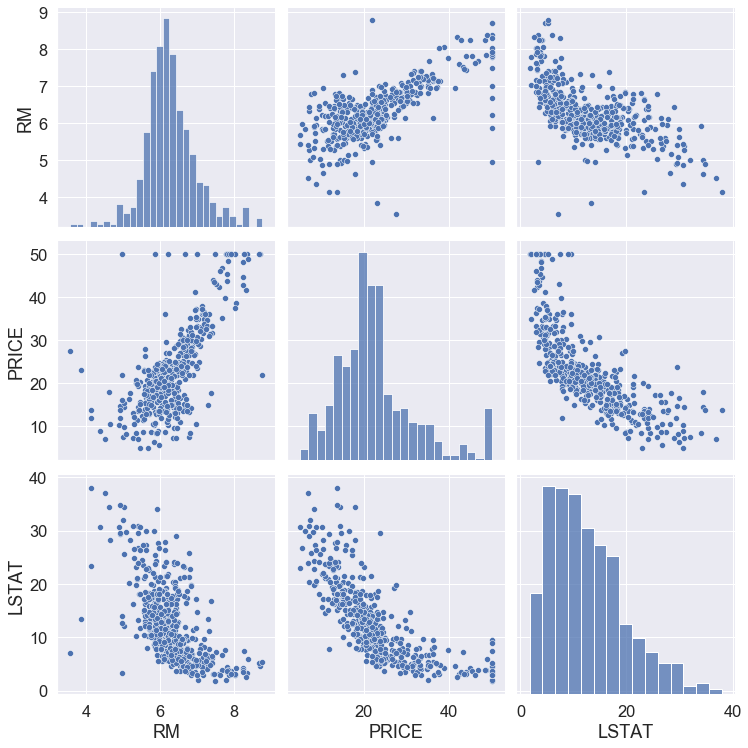

In [112]:
sns.pairplot(df_3col, height=3.5)
plt.tight_layout()

In [192]:
#score_with_80_20_split
#gbm_score_group_by_chas
#gbm_score_group_by_RM_mean

print("GBM Score with straight forward 80 20 split for test and train: {}".format(score_with_80_20_split))
print("GBM Score with group by houses near Charles river {}".format(gbm_score_group_by_chas))
print("GBM Score with group by mean Room number {}".format(gbm_score_group_by_RM_mean))

GBM Score with straight forward 80 20 split for test and train: 0.41068999209029244
GBM Score with group by houses near Charles river 0.8604330909439957
GBM Score with group by mean Room number -0.917916706590929
